# Sources/Derivations

#### Various constants

http://pdg.lbl.gov/2014/reviews/rpp2014-rev-astrophysical-constants.pdf

https://arxiv.org/pdf/1904.10000

https://arxiv.org/pdf/1502.01589.pdf

#### Functions

https://arxiv.org/pdf/1801.08609.pdf

$ N_0 =  2^{(5+n)/2}\Gamma(3+n/2)/(3\sqrt{\pi})$

http://sro.sussex.ac.uk/id/eprint/46339/1/MNRAS-2012-Schneider-684-98.pdf

$M_{hm} = \frac{4\pi\bar{\rho}}{3}\big(\frac{\lambda_{hm}}{2}\big)^3$

$\qquad = \frac{4\pi\bar{\rho}}{3}\big(\frac{\pi}{hk_{hm}}\big)^3$

$\therefore k_{hm} = \frac{\pi}{h}\big(\frac{4\pi\bar{\rho}}{3M_{hm}}\big)^{1/3}$

https://arxiv.org/pdf/1808.00001.pdf

$Rx_{no_Z} = \frac{N_0a\rho_bY_p\sigma_0}{m_{\chi}+m_p}\Big(\frac{T_0}{m_p}+\frac{T_{0}}{m_{\chi}}\Big)^{\frac{1+n}{2}}$


https://arxiv.org/pdf/1904.10000

$aH = R_{\chi}(m_{\chi}/(m_{\chi}+m_p))$

Note that $aH \sim z$ and $R_{\chi} \sim z^{n+5/2}$ such that

$zH_0\sqrt{\Omega_{rad}} = R_{\chi}(m_{\chi}/(m_{\chi}+m_p))z^{n+5/2}$

$\therefore z = ((m_{\chi}+m_p)H_0\sqrt{\Omega_{rad}}/R_{\chi}m_{\chi})^{2/n+3}$

https://arxiv.org/pdf/1904.10000

$aH = R_{\chi} = \frac{N_0a\rho_bY_p\sigma_0}{m_{\chi}+m_p}\Big(\frac{T_b}{m_p}+\frac{T_{\chi}}{m_{\chi}}\Big)^{\frac{1+n}{2}}$

Note that $aH \sim z$, $a\bar{\rho} \sim z^2$, $T_b \sim z$ and $T_{\chi} \sim z^2/z_{th}$, such that

$\frac{H_0\sqrt{\Omega_{rad}}(m_{\chi}+m_p)}{N_0Y_p\rho_b\sigma_0} = z^2/z \big(\frac{T_0z}{m_p}+\frac{T_0z^2}{z_{th}m_{\chi}}\big)^{n+1/2}$

$0 = z \big(\frac{T_0z}{m_p}+\frac{T_0z^2}{z_{th}m_{\chi}}\big)^{n+1/2} - \frac{H_0\sqrt{\Omega_{rad}}(m_{\chi}+m_p)}{N_0Y_p\rho_b\sigma_0}$

Solving the above for $z$ yields $z_{kin}$

https://arxiv.org/pdf/1904.10000

$k_{crit} = 2aH = 2H_0\sqrt{\Omega_{rad}}z^2/z = 2H_0\sqrt{\Omega_{rad}}z(\sigma_0,\dots)$

https://arxiv.org/pdf/1808.00001.pdf

$R_{x,kin} = \frac{N_0a\rho_bY_p\sigma_0}{m_{\chi}+m_p}\Big(\frac{T_0z_{th}}{m_p}+\frac{T_0z^2}{z_{th}m_{\chi}}\Big)^{\frac{1+n}{2}}$

https://arxiv.org/pdf/1808.00001.pdf

$R_{x,th} = \frac{N_0a\rho_bY_p\sigma_0}{m_{\chi}+m_p}\Big(\frac{T_0(1+z_{th})}{m_p}+\frac{T_0(1+z_{th})}{m_{\chi}}\Big)^{\frac{1+n}{2}}$

https://github.com/kboddy/class_public/blob/dmeff/source/thermodynamics.c#L126

$R_{\gamma} = a^{-2}n_ex_e\sigma_T$

$R_{\gamma} = R_{\chi,kin}$

$z^2n_ex_e\sigma_T = \frac{N_0a\rho_bY_p\sigma_0}{m_{\chi}+m_p}\Big(\frac{T_0z_{th}}{m_p}+\frac{T_0z^2}{z_{th}m_{\chi}}\Big)^{\frac{1+n}{2}}$

$\frac{n_ex_e\sigma_T(m_{\chi}+m_p)}{N_0Y_p\rho_b\sigma_0} = \Big(\frac{T_0z_{th}}{m_p}+\frac{T_0z^2}{z_{th}m_{\chi}}\Big)^{\frac{1+n}{2}}$

$0 = \Big(\frac{T_0z_{th}}{m_p}+\frac{T_0z^2}{z_{th}m_{\chi}}\Big)^{\frac{1+n}{2}} - \frac{n_ex_e\sigma_T(m_{\chi}+m_p)}{N_0Y_p\rho_b\sigma_0}$

---

# Relevant imports

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from scipy.signal import argrelextrema
import math
import numpy as np
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.legend_handler import HandlerBase
import matplotlib.pyplot as plt
import sys
import os,glob
import yaml
from scipy.special import gamma
from scipy.optimize import fsolve
from scipy.interpolate import interp1d  
import pandas as pd
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
from tqdm import tqdm 

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.size']=13
plt.rcParams['text.usetex']=True
plt.rcParams['font.family']='stix'
plt.rcParams['figure.figsize']= (6.5,4)
plt.rcParams['figure.dpi']=150
plt.rcParams['axes.facecolor'] = 'white'

---

In [18]:
class VDS0():  

############################# INITIALIZATION #############################
    
    def __init__(self, h = 0.6932, Omega_m = 0.23995, Omega_b = 0.04626, Omega_rad = 9.23640e-5, p_crit = 4.755e-6,
                 rho_crit = 4.755e-6, T0 = 2.7255, kb = 8.617333262145e-5, m_p = 0.93827231, nu = 1.12,
                 Y_p = 0.75, n_e = 0.18820, x_e = 1.16371, sigmaT = 6.65246e-29, c = 3e5, Mpc2cm = 3.086e24, 
                 masses = np.array([1.5e-5,1e-4,1e-3,1e-2,1e-1,1.,10.,100.]), 
                 sigma_array = np.logspace(-10,-40,600)):
        
        self.h = h
        self.H0 = 100*h
        self.Omega_m = Omega_m
        self.Omega_b = Omega_b
        self.Omega_rad = Omega_rad
        self.Y_p = Y_p
        self.m_p = m_p
        self.nu = nu
        self.n_e = n_e
        self.x_e = x_e
        self.sigmaT = sigmaT
        self.rho_crit = 1.256*10**11*Omega_m
        self.rho_b = Omega_b*p_crit
#         self.T_0 = kb*T0*1e-9
        self.T_0 = 2.353e-13        
        self.Mpc2m = Mpc2cm*1e-2
        self.Rx_conerverionFactor = c*Mpc2cm
        
        self.masses = masses
        self.sigma_array = sigma_array
            
############################# SEMI-ANALYTIC FUNCTIONS #############################
    
    def N_0(self,n):
        return pow(2,(5.+n)/2.)*gamma(3.+n/2.)/(3.*np.sqrt(np.pi))

    def mhm2khm(self,Mhm):
        return np.pi/self.h*(((4.*np.pi*self.rho_crit)/(3*Mhm))**(1./3.))
        
    def Rx(self,z,sigma_0, m_x, n):
        return pow(z,2)*self.N_0(n)*self.Y_p*self.rho_b*self.Rx_conerverionFactor*(sigma_0/(m_x+self.m_p))*(pow(((self.T_0*(1+z))/(m_x))+((self.T_0*(1+z))/self.m_p),((1.+n)/2.)))

    def Rx_noZ(self,sigma_0, m_x, n):
        return self.N_0(n)*self.Y_p*self.rho_b*self.Rx_conerverionFactor*(sigma_0/(m_x+self.m_p))*(pow((self.T_0/m_x)+(self.T_0/self.m_p),((1.+n)/2.)))
    
    def Rx_kin(self,z,sigma_0,m_x,n):
        return (pow(z,2) * ((self.T_0*z**2)/(self.z_th(sigma_0,m_x,n)*m_x) + (self.T_0*z)/self.m_p)**((n+1.)/2.))*(self.N_0(n)*self.Y_p*self.rho_b*self.Rx_conerverionFactor*(sigma_0/(m_x+self.m_p)))

    def Rx_th(self,z,sigma_0, m_x, n):
        return pow(z,2)*self.N_0(n)*self.Y_p*self.rho_b*self.Rx_conerverionFactor*(sigma_0/(m_x+self.m_p))*(pow((self.T_0*z)/(m_x)+((self.T_0*z)/self.m_p),((1.+n)/2.)))
    
    def Rgamma(self,z):
        return pow(z,2)*self.n_e*self.x_e*self.sigmaT*self.Mpc2m
    
    def aH(self,z,sigma_0,m_x,n):
        return z*(self.H0*np.sqrt(self.Omega_rad))

    def z_th(self,sigma_0,m_x,n):
        return ((self.H0*np.sqrt(self.Omega_rad)*(m_x+self.m_p))/(self.Rx_noZ(sigma_0,m_x,n)*m_x))**(2./(n+3.))

    def z_kin(self,sigma_0,m_x,n):
        return fsolve(lambda z: z * ((self.T_0*z**2)/((1+self.z_th(sigma_0,m_x,n))*m_x) + (self.T_0*z)/self.m_p)**((n+1.)/2.) - (self.H0*np.sqrt(self.Omega_rad)/(self.N_0(n)*self.Y_p*self.rho_b*self.Rx_conerverionFactor))*(m_x+self.m_p)/sigma_0,self.z_th(sigma_0,m_x,n)/2.)    
    
    def z_gamma(self,sigma_0,m_x,n):
        return fsolve(lambda z: ((self.T_0*z**2)/(self.z_th(sigma_0,m_x,n)*m_x) + (self.T_0*self.z_th(sigma_0,m_x,n))/self.m_p)**((n+1.)/2.) - (self.n_e*self.x_e*self.sigmaT*self.Mpc2m/(self.N_0(n)*self.Y_p*self.rho_b*self.Rx_conerverionFactor))*(m_x+self.m_p)/sigma_0,self.z_th(sigma_0,m_x,n)/2.)    

    def sigma2k(self,sigma_0,m_x,n):
        return 2*(self.H0*np.sqrt(self.Omega_rad)*self.z_kin(sigma_0,m_x,n))*3.33e-6
    
    def sigma2k2(self,sigma_0,m_x,n):
        return 2*(self.H0*np.sqrt(self.Omega_rad)*self.z_gamma(sigma_0,m_x,n))*3.33e-6

    def sig(self,klimit,n,masses):
        sigma = []
        for i in range(len(masses)):
            sigma.append(self.sigma_array[np.argmin(np.abs(self.sigma2k(self.sigma_array,masses[i],n)-self.h*klimit))])
        return np.array(sigma)

    def sig2(self,klimit,n):
        sigma = []
        for i in range(len(self.masses)):
            sigma.append(self.sigma_array[np.argmin(np.abs(self.sigma2k2(self.sigma_array,self.masses[i],n)-self.h*klimit))])
        return np.array(sigma)
    
    def sigma_vs_mx(self,klimit,n):
        return hv.Curve((masses, self.sig(klimit,n)))
    
############################# INI GENERATION #############################

    def make_inis(self,ini_base_file='class/inis/dmeff_base.ini',base_inis_path='class/inis/',class_runner_path = 'class/',npow=0,
                  masses=np.array([1e-4,1e-3,1e-2,1e-1,1.,10.]),sigmas=np.logspace(-20,-30,100),output_path='pk_output',
                  sh_file='class/run_classes.sh'):
    
        fin =  open(ini_base_file, 'r')
        base_content = fin.read()
        fin.close()
        fout_sh = open(class_runner_path+'run_classes.sh', 'w')

        for m in masses:
            for sigma in sigmas:
                filename = 'n{}_m{}_s{}.ini'.format(npow,m,sigma)
                fout_sh.write('./class ' + 'inis/{}\n'.format(filename))
                fout = open(base_inis_path + filename, 'w')
                fout.write(base_content)
                fout.write('\n')
                npow_line = 'npow_dmeff = {}\n'.format(npow)
                fout.write(npow_line)
                m_line = 'm_dmeff = {}\n'.format(m)
                fout.write(m_line)
                sigma_line = 'sigma_dmeff = {}\n'.format(sigma)
                fout.write(sigma_line)
                if npow<0:
                    vel_line = 'Vrel_dmeff_rate = 30\n' #sets to DBK case.
                    fout.write(vel_line)
                root_line = 'root = {}/n{}_m{}_s{}_\n'.format(output_path,npow,m,sigma)
                fout.write(root_line)

        fout_sh.close()

############################# TK PLOTTING FUNCTIONS #############################
        
    def single_tk(self,npow=0,m=0.0001,plotPeaks=False,pltType='none',
                  index=0,sigmas=np.logspace(-20,-30,100),lw=2.5,label='',
                  c='k',ls='-',alpha=1):

        data0 = np.loadtxt('class/pk_output/lcdm_z1_pk.dat')
        ks = data0[:,0]
        pk0 = data0[:,1]

        for i,sigma in enumerate(sigmas):
            # Index of interest
            if i!=index:
                continue
            print(sigma)
            
            # pk data from class for given mass, sigma, power
            filename = 'class/pk_output/n{}_m{}_s{}_z1_pk.dat'.format(npow,m,sigma)   
            print(filename)
            data = np.loadtxt(filename)
            pk = data[:,1]
            ax.plot(ks,pk[:255]/pk0[:255],linewidth=lw,linestyle=ls,color=c,label=label,alpha=alpha)

        return (pk[:255])/pk0[:255],ks,sigma
    
    def transfer(self,k,mwdm):
        lambda_fs = (0.049*(mwdm**(-1.11))*((self.Omega_m/0.25)**(0.11))*((self.h/0.7)**1.22))
        alpha = lambda_fs
        transfer = (1+(alpha*k)**(2*self.nu))**(-5./self.nu)
        return transfer    

In [19]:
vds0 = VDS0()

---

# Limits

### Numerical approach

For each given mass, fit the IDM transfer function to the WDM limit such that structure is sufficiently supressed at all scales (structure in IDM transfer function always sits below that of WDM). To try different cross-sections (and consequently different transfer functions), change the index parameter

To generate data files associated with a given mass/cross-section: <br>
1. First generate ini files in class via:<br> vds0.make_inits(npow=VELOCITY DEPENDENCE, masses=MASS OF INTEREST, sigmas=RANGE OF CROSS-SECTIONS)
2. Enter the class directory and run:<br> ./class inis/dmeff_base.ini

In [9]:
masses_test = [1e-4,1e-3,1e-2,1e-1,1.,10.]
lowmass = np.logspace(-28,-32,50)
n0n2sigs = np.logspace(-20,-30,50)
n2sigs_m10 = np.logspace(-15,-25,50)
n4sigs_m10 = np.logspace(-8,-15,50)
n4sigs_m0001 = np.logspace(-20,-27,50)
n4sigs_m001 = np.logspace(-17,-25,50)
n4sigs_m01 = np.logspace(-15,-20,50)
n4sigs_m1 = np.logspace(-16,-20,20)
n6sigs_m0001 = np.logspace(-20,-25,20)
n6sigs_m001 = np.logspace(-15.2,-17,20)
n6sigs_m01 = np.logspace(-12,-15,20)
n6sigs_m0_1 = np.logspace(-10,-12,20)
n6sigs_m1 = np.logspace(-7,-10,20)

# Uncomment line below if generating ini files with CLASS
# vds0.make_inis(npow=4,masses=[0.000015],sigmas=lowmass)

6.866488450043026e-29
class/pk_output/n0_m0.0001_s6.866488450043026e-29_z1_pk.dat


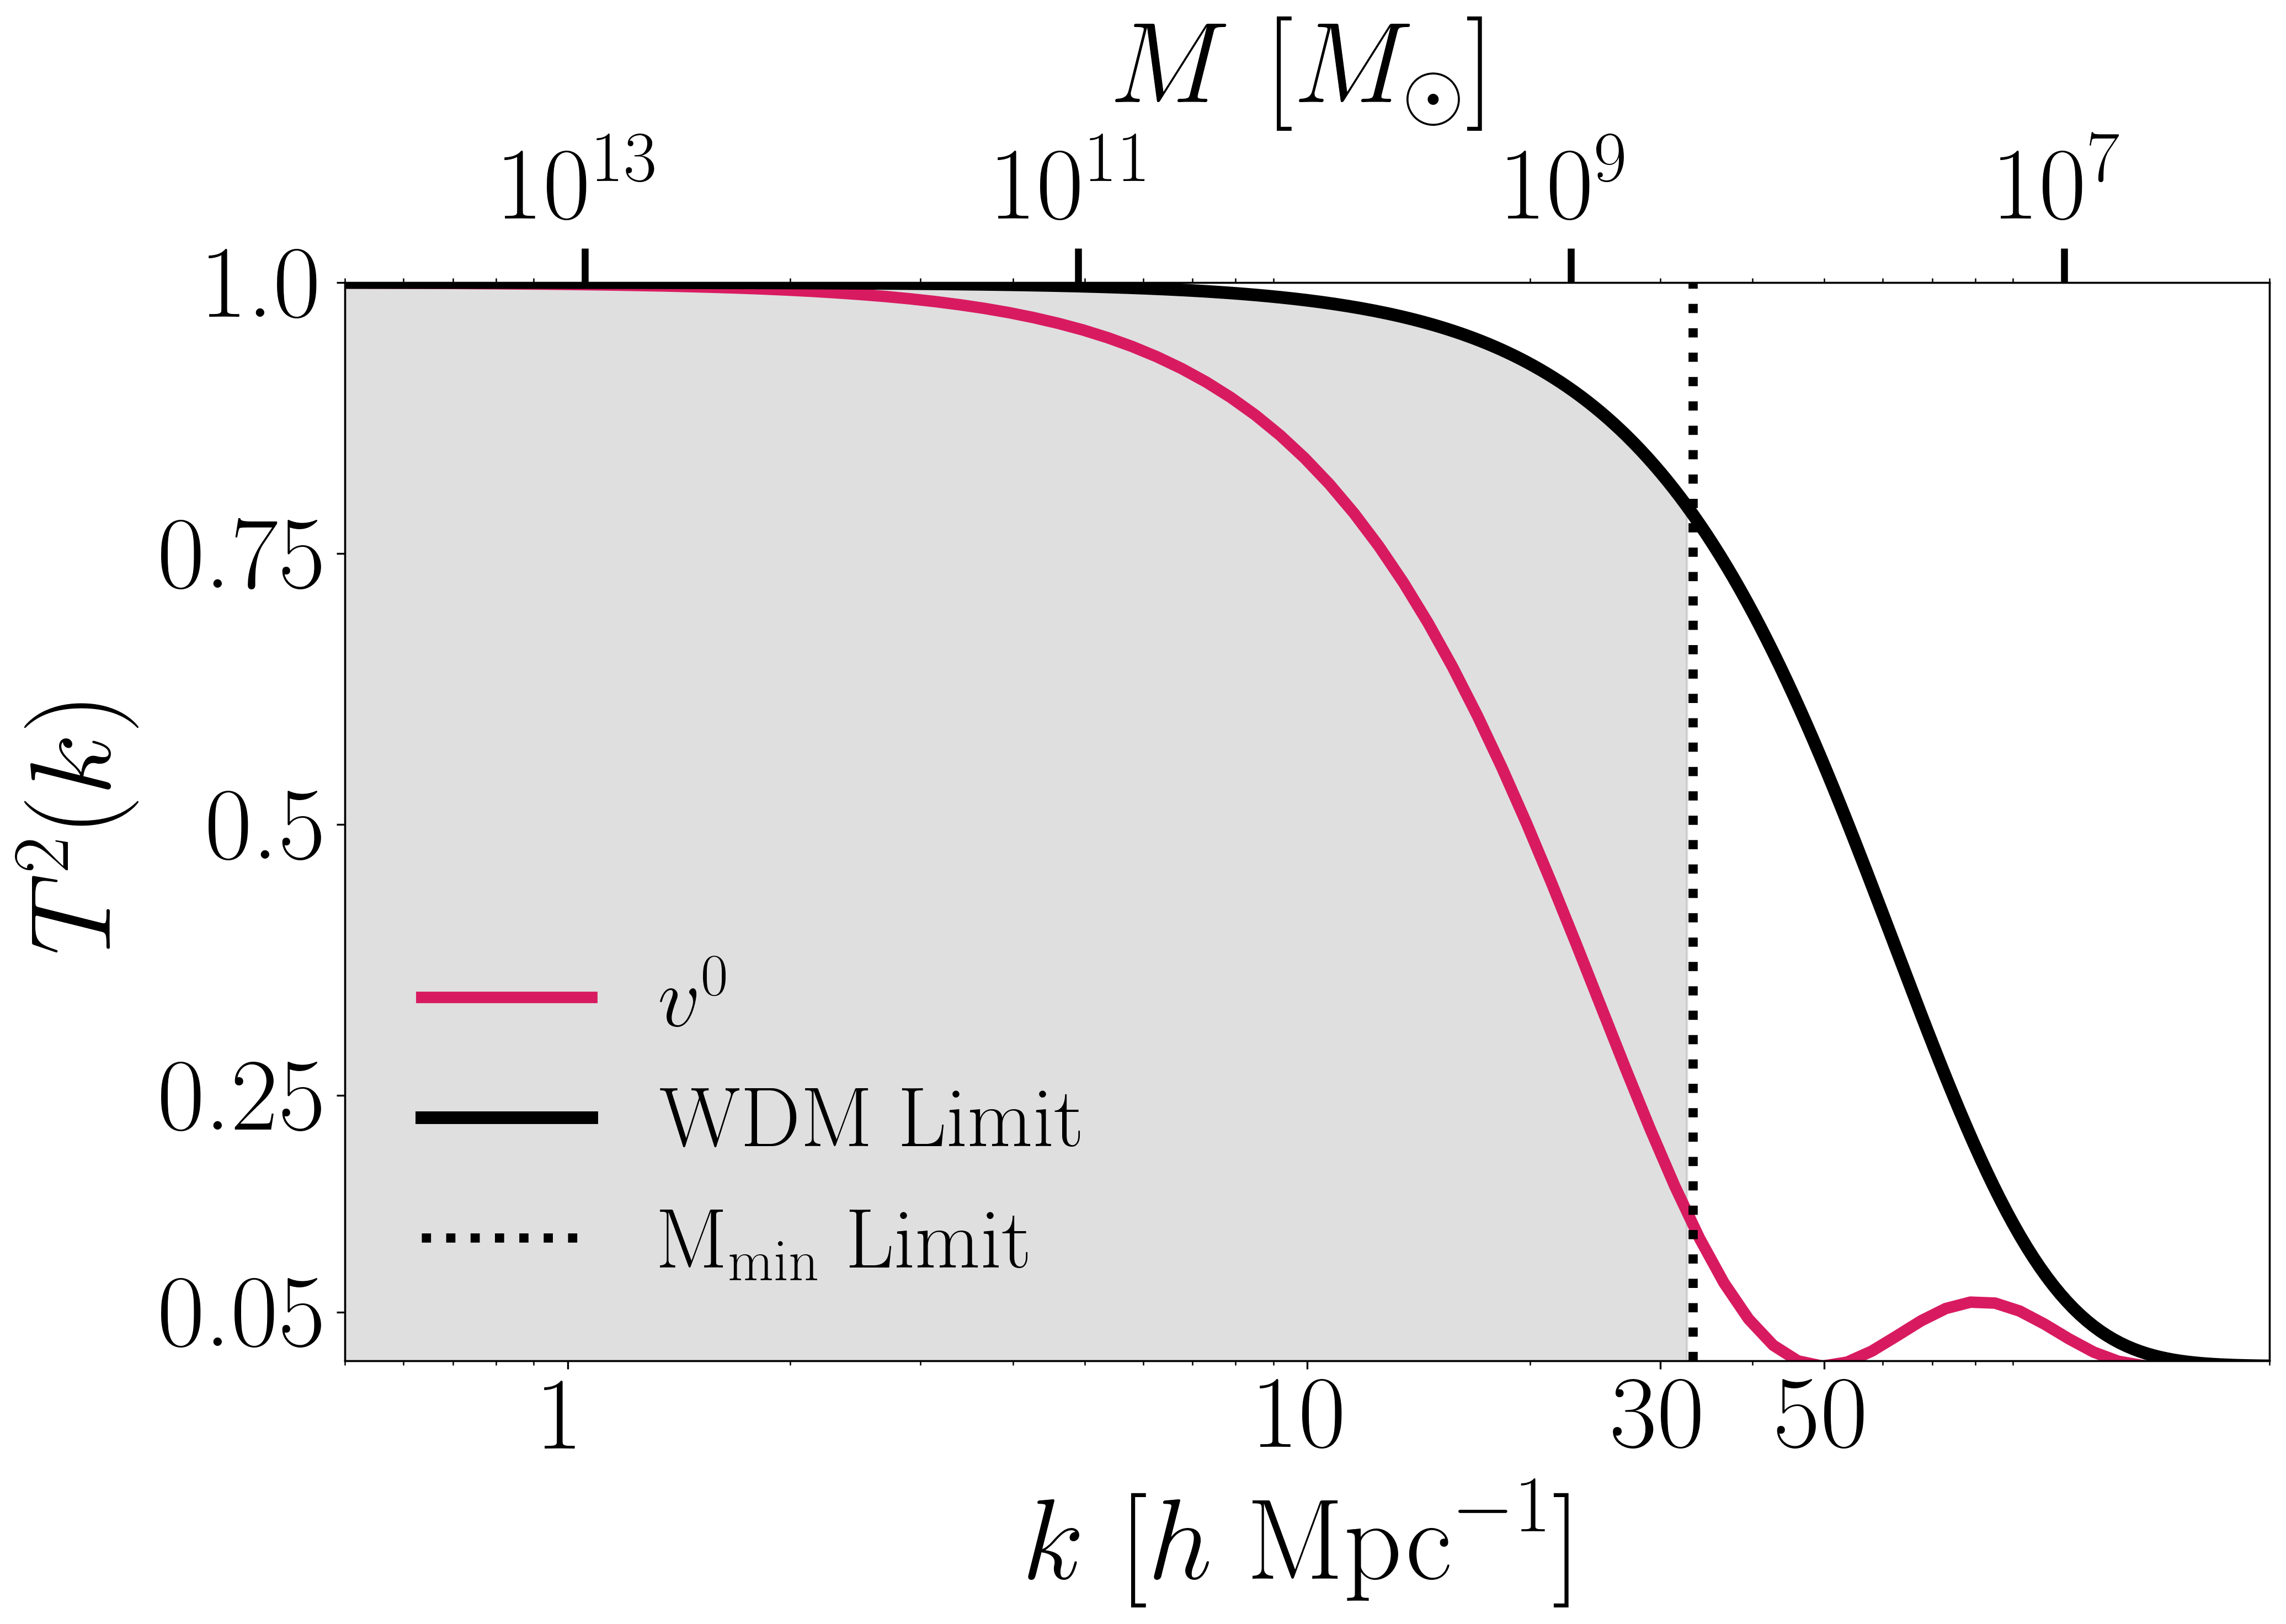

In [21]:
klim = vds0.mhm2khm(3.2*10**8)
kcmb = vds0.mhm2khm(1e14)

fig = plt.figure(figsize=(14,10))    
ax = fig.add_subplot(111)
ax2 = ax.twiny()

###################################################### n=0 #########################################################
##### m=0.000015 GeV #####
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=0,m=0.000015,c='#D81B60',label='$v^0$',ls='-',sigmas=n0n2sigs,index=42,lw=5)

##### m=0.0001 GeV #####
tk_idm_c,ks,sigma0 = vds0.single_tk(npow=0,m=0.0001,c='#D81B60',label='$v^0$',ls='-',sigmas=n0n2sigs,index=40,lw=5)

##### m=0.001 GeV #####
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=0,m=0.001,c='#D81B60',label='$v^2$',ls='-',sigmas=n0n2sigs,index=38,lw=5)

###### m=0.01 GeV ######
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=0,m=0.01,c='#D81B60',label='$v^0$',ls='-',sigmas=n0n2sigs,index=37,lw=5)

###### m=0.1 GeV ######
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=0,m=0.1,c='#D81B60',label='$v^0$',ls='-',sigmas=n0n2sigs,index=36,lw=5)

######## m=1 GeV ########
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=0,m=1,c='#D81B60',label=r'$v^0$',sigmas=n0n2sigs,index=33,lw=5)

##### m=10 GeV #####
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=0,m=10,c='#D81B60',label='$v^0$',ls='-',sigmas=n0n2sigs,index=29,lw=5)

##### m=100 GeV #####
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=0,m=100,c='#D81B60',label='$v^0$',ls='-',sigmas=n0n2sigs,index=24,lw=5)

###################################################### n=2 #########################################################
##### m=0.000015 GeV #####
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=2,m=0.000015,c='#D81B60',label='$v^0$',ls='-',sigmas=n0n2sigs,index=40,lw=5)

##### m=0.00005 GeV #####
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=2,m=0.00005,c='#D81B60',label='$v^0$',ls='-',sigmas=n0n2sigs,index=35,lw=5)

##### m=0.0001 GeV #####
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=2,m=0.0001,c='#D81B60',label='$v^2$',ls='-',sigmas=n0n2sigs,index=30,lw=5)

##### m=0.0005 GeV #####
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=2,m=0.0005,c='#D81B60',label='$v^0$',ls='-',sigmas=n0n2sigs,index=22,lw=5)

##### m=0.001 GeV #####
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=2,m=0.001,c='#D81B60',label='$v^2$',ls='-',sigmas=n0n2sigs,index=20,lw=5)

##### m=0.005 GeV #####
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=2,m=0.005,c='#D81B60',label='$v^0$',ls='-',sigmas=n0n2sigs,index=16,lw=5)

###### m=0.01 GeV ######
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=2,m=0.01,c='#D81B60',label='$v^2$',ls='-',sigmas=n0n2sigs,index=14,lw=5)

##### m=0.05 GeV #####
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=2,m=0.05,c='#D81B60',label='$v^0$',ls='-',sigmas=n0n2sigs,index=10,lw=5)

###### m=0.1 GeV ######
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=2,m=0.1,c='#D81B60',label='$v^2$',ls='-',sigmas=n0n2sigs,index=9,lw=5)

##### m=0.5 GeV #####
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=2,m=0.5,c='#D81B60',label='$v^0$',ls='-',sigmas=n0n2sigs,index=6,lw=5)

######## m=1 GeV ########
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=2,m=1,c='#ED578D',label=r'$v^2$',sigmas=n0n2sigs,index=4,lw=4)

##### m=5 GeV #####
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=2,m=5,c='#D81B60',label='$v^0$',ls='-',sigmas=n0n2sigs,index=0,lw=5)

##### m=10 GeV #####
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=2,m=10,c='#D81B60',label='$v^0$',ls='-',sigmas=n2sigs_m10,index=24,lw=5)

##### m=100 GeV #####
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=2,m=100,c='#D81B60',label='$v^0$',ls='-',sigmas=n2sigs_m10,index=19,lw=5)

###################################################### n=4 #########################################################
##### m=0.000015 GeV #####
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=4,m=0.000015,c='#D81B60',label='$v^0$',ls='-',sigmas=lowmass,index=10,lw=5)

##### m=0.0001 GeV #####
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=4,m=0.0001,c='#D81B60',label='$v^4$',ls='-',sigmas=n4sigs_m0001,index=35,lw=5)

##### m=0.0003 GeV #####
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=4,m=0.0003,c='#D81B60',label='$v^4$',ls='-',sigmas=n4sigs_m0001,index=20,lw=5)

###### m=0.001 GeV ######
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=4,m=0.001,c='#D81B60',label='c',ls='-',sigmas=n4sigs_m001,index=23,lw=5)

###### m=0.01 GeV ######
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=4,m=0.01,c='#D81B60',label='c',ls='-',sigmas=n4sigs_m01,index=36,lw=5)

###### m=0.1 GeV ######
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=4,m=0.1,c='#D81B60',label='c',ls='-',sigmas=n4sigs_m01,index=15,lw=5)

######## m=1 GeV ########
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=4,m=1,c='#D81B60',label=r'$v^4$',sigmas=n4sigs_m1,index=1,lw=4)

##### m=10 GeV #####
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=4,m=10,c='#D81B60',label='$v^0$',ls='-',sigmas=n4sigs_m10,index=41,lw=5)

##### m=100 GeV #####
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=4,m=100,c='#D81B60',label='$v^0$',ls='-',sigmas=n4sigs_m10,index=34,lw=5)

###################################################### n=6 #########################################################
##### m=0.000015 GeV #####
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=6,m=0.000015,c='#D81B60',label='$v^0$',ls='-',sigmas=lowmass,index=21,lw=5)

##### m=0.0001 GeV #####
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=6,m=0.0001,c='#D81B60',label='$v^6$',ls='-',sigmas=n6sigs_m0001,index=12,lw=5)

###### m=0.001 GeV ###### PROBLEMATIC
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=6,m=0.001,c='#D81B60',label='c',ls='-',sigmas=n6sigs_m001,index=0,lw=5)

###### m=0.01 GeV ######
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=6,m=0.01,c='#D81B60',label='c',ls='-',sigmas=n6sigs_m01,index=0,lw=5)

###### m=0.1 GeV ######
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=6,m=0.1,c='#D81B60',label='c',ls='-',sigmas=n6sigs_m0_1,index=3,lw=5)

##### m=1 GeV #####
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=6,m=1,c='#7E1038',label=r'$v^6$',sigmas=n6sigs_m1,index=14,lw=4)

##### m=10 GeV #####
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=6,m=10,c='#D81B60',label='$v^0$',ls='-',sigmas=n6sigs_m1,index=7,lw=5)

##### m=100 GeV #####
# tk_idm_c,ks,sigma0 = vds0.single_tk(npow=6,m=100,c='#D81B60',label='$v^0$',ls='-',sigmas=n6sigs_m1,index=0,lw=5)

############################################### WDM/Mmin Limits #########################################################
ks2 = np.logspace(-5,4,1000)
ax.semilogx(ks2,vds0.transfer(ks2,6.5)**2,linestyle='-',label='WDM Limit',c='k',lw=5.5)
ax.axvline(klim,c='k',ls=':',lw=4,label=r'M$_{\rm{min}}$ Limit')
ax.fill_between(np.logspace(-5,4,1000), -10, vds0.transfer(ks2,6.5)**2,where=np.logspace(-5,4,1000)<klim,color='grey',alpha=0.25)
# ax.text(0.59,0.6,"Excluded",c='k',alpha=0.6,fontsize=55)

################################################# PLOT OPTIONS #####################################################
ax.set_xscale('log')
ax.set_xlim(0.5,200)
ax.set_ylim(0.005,1.)
ax.set_xlabel(r'$k$ [$h\ \rm{Mpc}^{-1}$]',fontsize=50,labelpad=5)
ax.set_ylabel(r'$T^2(k)$',fontsize=50,labelpad=10)
ax.set_xticks([1,10,30,50])
ax.set_xticklabels(["1","10","30","50"],fontsize=45)
ax.set_yticks([0.05,0.25,0.5,0.75,1.0])
ax.set_yticklabels([0.05,0.25,0.5,0.75,1.0],fontsize=45)
ax.legend(fontsize=37,framealpha=0,loc='lower left')
# ax2.text(2.1, 0.445, "analytic estimates",size=35)
ax2.set_xscale('log')
ax2.set_xlim(0.5,200)
ax2.set_xticks([vds0.mhm2khm(10**13),vds0.mhm2khm(10**11),vds0.mhm2khm(10**9),vds0.mhm2khm(10**7)])
ax2.set_xticklabels([r'10$^{13}$',r'10$^{11}$',r'10$^{9}$',r'10$^{7}$'],fontsize=45)
ax2.set_xlabel(r'$M$ [$M_{\rm{\odot}}$]',fontsize=50,labelpad=20)
ax2.tick_params(length=15,width=3)

plt.tight_layout()

### Figure 3

**Instructions for Figure 3:**<br>
Below are the limits used in Figure 3. The conservative limits are hardcoded as per the above. The analytic limits call the sig() function which calculates the limits for the given klim (from Mmin)

In [23]:
mass = vds0.masses
mass6 = np.logspace(-5,2,25)
mass4 = [1.5e-5,1e-4,3e-4,1e-3,1e-2,1e-1,1.,10.,100.]
mass_eft6 = [1,1000]
mass_eft = [1.5e-5,0.001,1,1000]

sigs0cons = np.array([2.682695795279738e-29,   #1.5e-5
                      6.866488450043026e-29,   #1e-4
                      1.7575106248547966e-28,  #1e-3
                      2.8117686979742367e-28,  #1e-2
                      4.498432668969453e-28,   #1e-1
                      1.8420699693267164e-27,  #1
                      1.2067926406393265e-26,  #10
                      1.2648552168552905e-25]) #100

sigs2cons = np.array([6.866488450043026e-29,
                      7.543120063354607e-27,
                      8.28642772854686e-25,
                      1.389495494373136e-23,
                      1.4563484775012383e-22,
                      1.5264179671752366e-21,
                      1.2648552168552906e-20,
                      1.3257113655901108e-19])

sigs4cons = np.array([1.5264179671752366e-29,
                      1.9306977288832457e-26,
#                       1.389495494373136e-23,
                      1.7575106248547966e-21,
                      2.1209508879201925e-19,
                      2.94705170255181e-17,
                      5.455594781168515e-16,
                      1.389495494373136e-14,
                      1.389495494373136e-13])

sigs6cons = np.array([1.9306977288832455e-30,
                      6.951927961775591e-24,
                      6.309573444801943e-16,
                      1e-12,
                      4.832930238571752e-11,
                      6.15848211066028e-10,
                      7.847599703514623e-09,
                      1e-07])

sigs0_anal = [vds0.sig(klim,0.,mass)[0],vds0.sig(klim,0.,mass)[1],vds0.sig(klim,0.,mass)[2],vds0.sig(klim,0.,mass)[3],vds0.sig(klim,0.,mass)[4],vds0.sig(klim,0.,mass)[5],vds0.sig(klim,0.,mass)[6],vds0.sig(klim,0.,mass)[7]]
sigs2_anal = [vds0.sig(klim,2.,mass)[0],vds0.sig(klim,2.,mass)[1],vds0.sig(klim,2.,mass)[2],vds0.sig(klim,2.,mass)[3],vds0.sig(klim,2.,mass)[4],vds0.sig(klim,2.,mass)[5],vds0.sig(klim,2.,mass)[6],vds0.sig(klim,2.,mass)[7]]
sigs4_anal = [vds0.sig(klim,4.,mass)[0],vds0.sig(klim,4.,mass)[1],vds0.sig(klim,4.,mass)[2],vds0.sig(klim,4.,mass)[3],vds0.sig(klim,4.,mass)[4],vds0.sig(klim,4.,mass)[5],vds0.sig(klim,4.,mass)[6],vds0.sig(klim,4.,mass)[7]]
# sigs6_anal = [vds0.sig(klim,6.,mass)[0],vds0.sig(klim,6.,mass)[1],vds0.sig(klim,6.,mass)[2],vds0.sig(klim,4.,mass)[3],vds0.sig(klim,6.,mass)[4],vds0.sig(klim,6.,mass)[5],vds0.sig(klim,6.,mass)[6],vds0.sig(klim,6.,mass)[7]]
sigs6_anal = [vds0.sig(klim,6.,mass6)[i] for i in tqdm(range(len(mass6)))]

sigs0_eft = np.array([8.8e-27,2.6e-26,1.5e-25,1.4e-23])
sigs2_eft = np.array([4.2e-23,4.3e-21,5.3e-18,2.2e-15])
sigs4_eft = np.array([1.6e-20,1.0e-16,4.1e-11,9.3e-09])
sigs6_eft = np.array([5.0e-04,1.5e+00])

  0%|          | 0/25 [00:00<?, ?it/s]<ipython-input-18-9b843082966f>:62: RuntimeWarning: invalid value encountered in power
  return fsolve(lambda z: z * ((self.T_0*z**2)/((1+self.z_th(sigma_0,m_x,n))*m_x) + (self.T_0*z)/self.m_p)**((n+1.)/2.) - (self.H0*np.sqrt(self.Omega_rad)/(self.N_0(n)*self.Y_p*self.rho_b*self.Rx_conerverionFactor))*(m_x+self.m_p)/sigma_0,self.z_th(sigma_0,m_x,n)/2.)
100%|██████████| 25/25 [06:52<00:00, 16.51s/it]


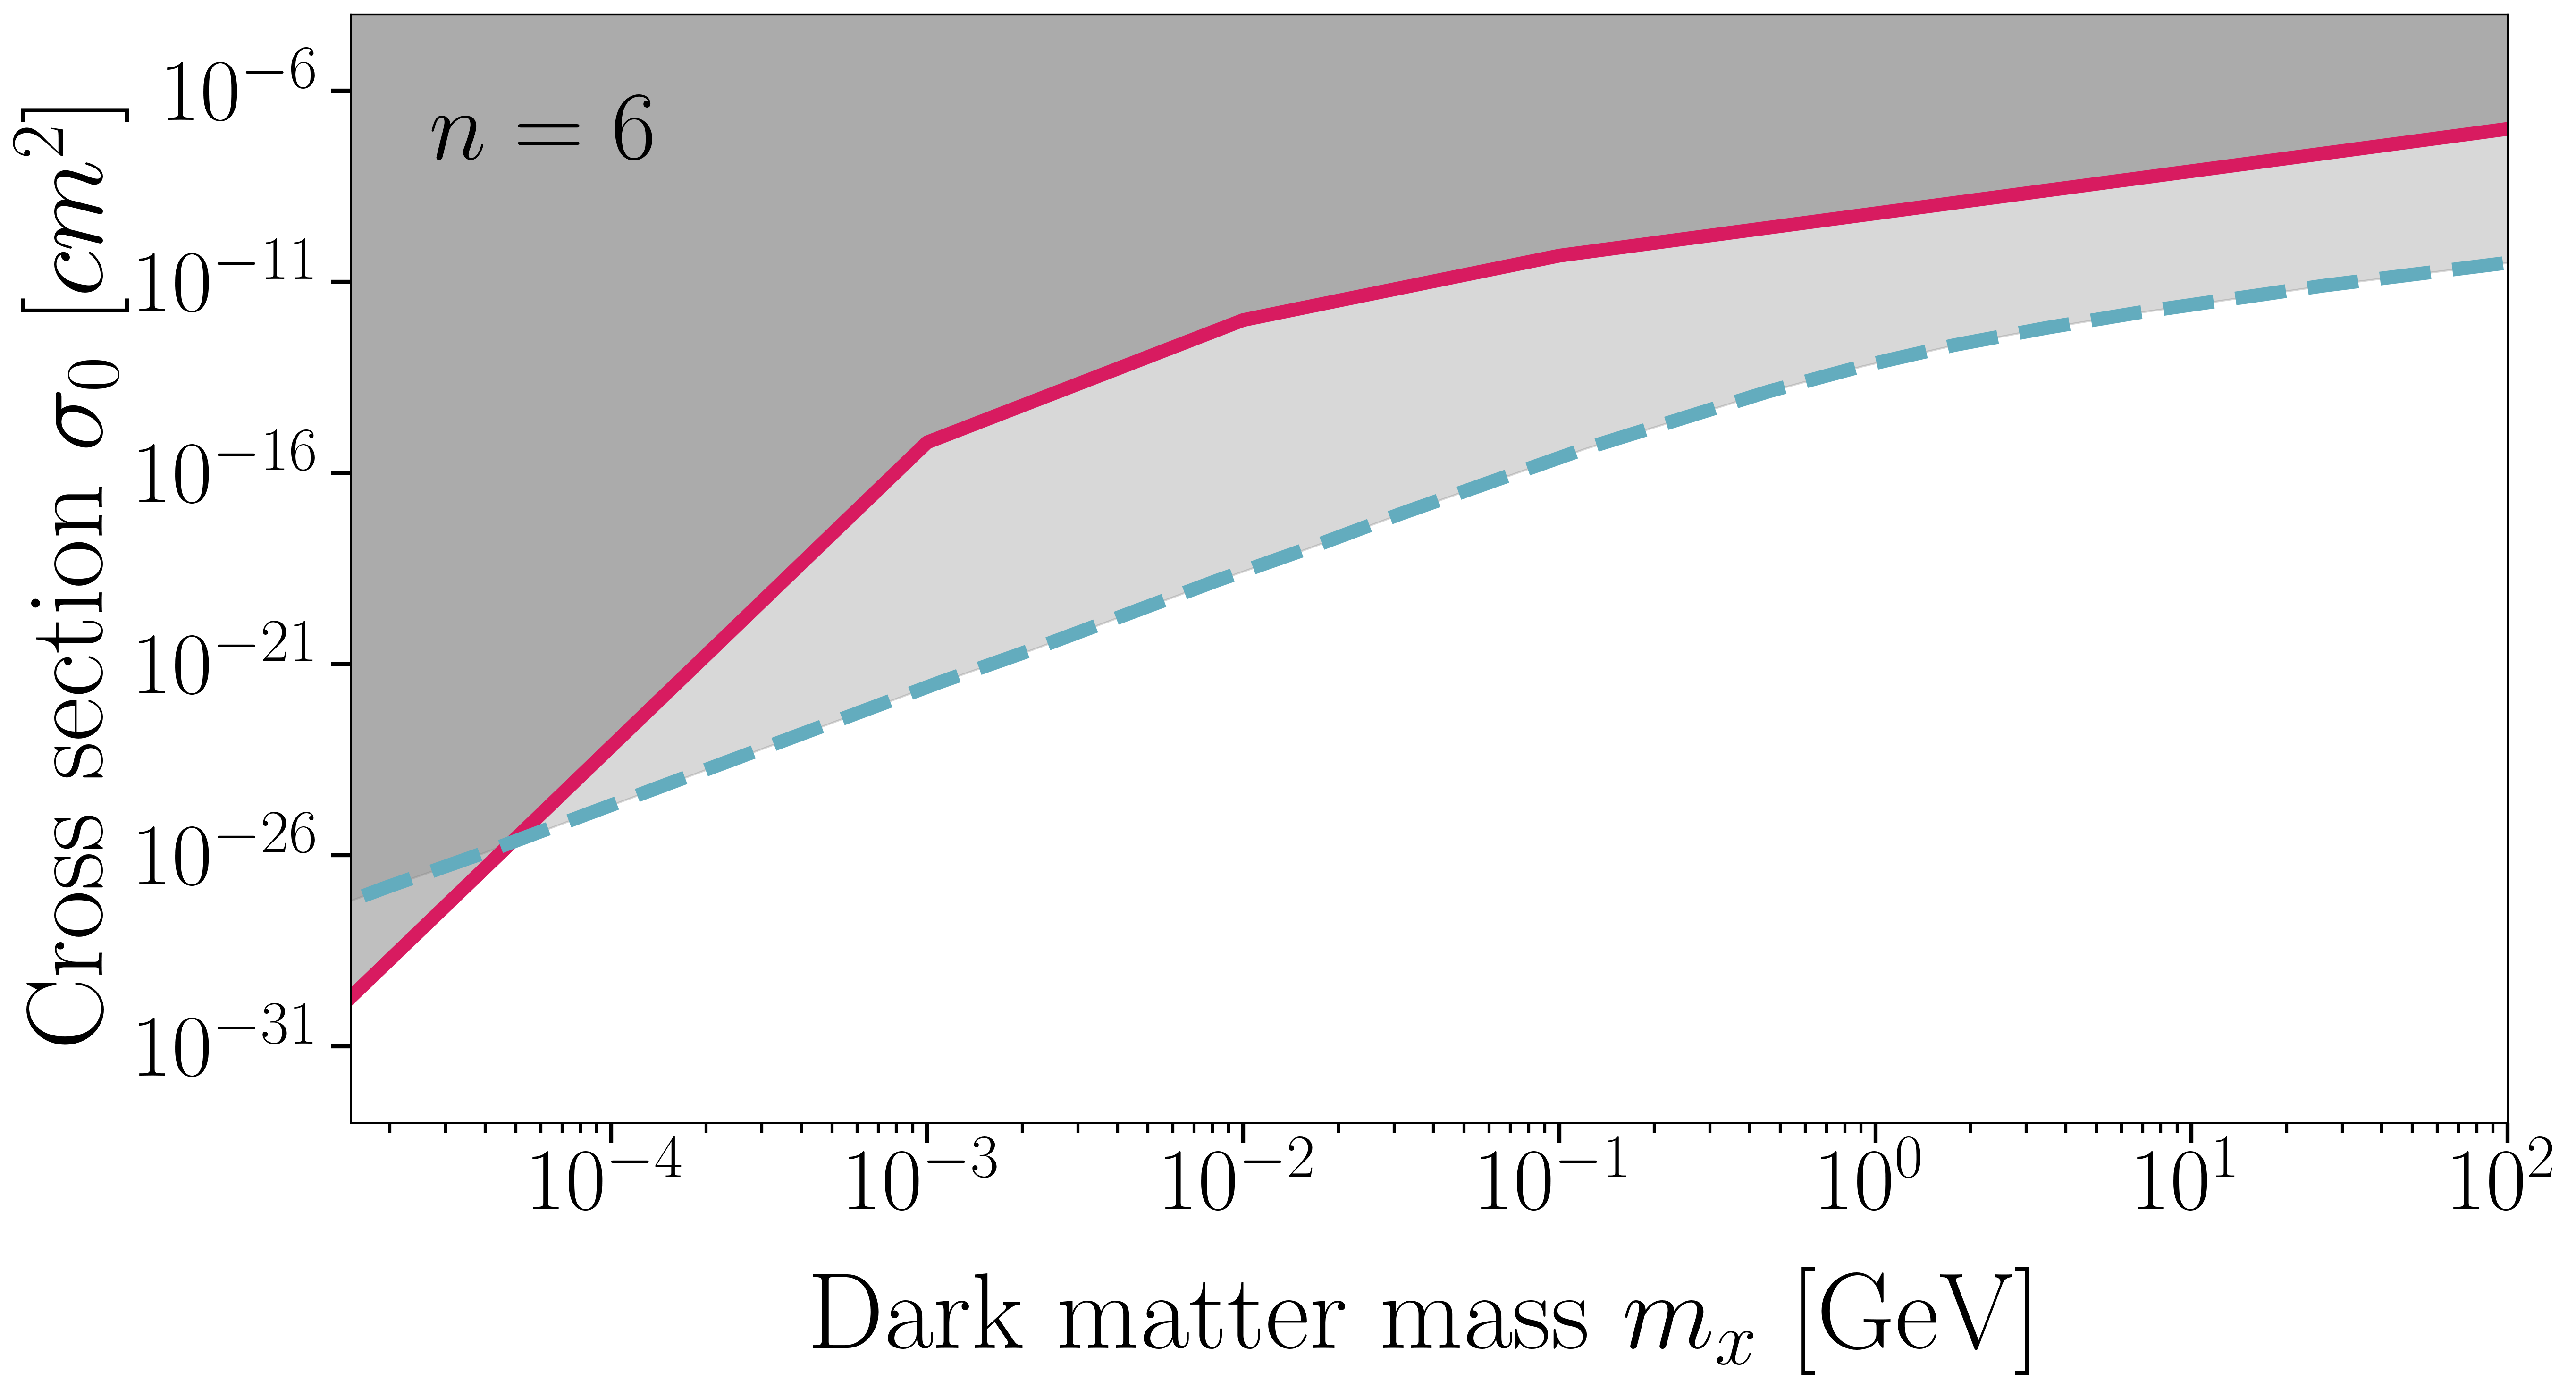

In [29]:
plt.figure(figsize=(18,10))

##### n=0 ######
# plt.loglog(mass_eft,sigs0_eft,label="CMB",linestyle='-',c='k',lw=7)
# plt.loglog(massFIRAS,firasN0,label="FIRAS",linestyle='-',c='#683d61',lw=7)
# plt.loglog(mass,sigs0cons,label="Numerical limit",linestyle='-',c='#D81B60',lw=7)
# plt.loglog(mass, sigs0_anal,label="Analytic estimate",lw=7,linestyle='-',c='#63acbe')
# plt.fill_between(mass, sigs0_anal, 1, color='grey', alpha=0.3)
# plt.fill_between(mass, sigs0cons, 1, color='grey', alpha=0.5)
# plt.text(2.7e-5,6.5e-17,"$n=0$",fontsize=50)
# plt.yticks([1e-30,1e-27,1e-24,1e-21,1e-18,1e-15],["$10^{-30}$","$10^{-27}$","$10^{-24}$","$10^{-21}$","$10^{-18}$","$10^{-15}$"])
# plt.ylim(1e-31,1e-14)

###### n=2 ######
# plt.loglog(mass_eft,sigs2_eft,label="CMB",linestyle='-',c='k',lw=7)
# plt.loglog(mass,sigs2cons,label="Numerical limit",linestyle='-',c='#D81B60',lw=7)
# plt.loglog(mass, sigs2_anal, label="Analytic estimate",lw=7,linestyle='--',c='#63acbe')
# plt.fill_between(mass, sigs2_anal, 1, color='grey', alpha=0.3)
# plt.fill_between(mass, sigs2cons, 1, color='grey', alpha=0.5)
# plt.text(2.7e-5,6.5e-17,"$n=2$",fontsize=50)
# plt.yticks([1e-30,1e-27,1e-24,1e-21,1e-18,1e-15],["$10^{-30}$","$10^{-27}$","$10^{-24}$","$10^{-21}$","$10^{-18}$","$10^{-15}$"])
# plt.ylim(1e-31,1e-14)

###### n=4 ######
# plt.loglog(mass_eft,sigs4_eft,label="CMB",linestyle='-',c='k',lw=7)
# plt.loglog(mass,sigs4cons,label="Numerical limit",linestyle='-',c='#D81B60',lw=7)
# plt.loglog(mass, sigs4_anal, label="Analytic estimate",lw=7,linestyle='--',c='#63acbe')
# plt.fill_between(mass, sigs4_anal, 20, color='grey', alpha=0.3)
# plt.fill_between(mass, sigs4cons, 20, color='grey', alpha=0.5)
# plt.text(2.7e-5,1.5e-8,"$n=4$",fontsize=50)
# plt.yticks([1e-31,1e-26,1e-21,1e-16,1e-11,1e-6],["$10^{-31}$","$10^{-26}$","$10^{-21}$","$10^{-16}$","$10^{-11}$","$10^{-6}$"])
# plt.ylim(1e-33,1e-4)

###### n=6 ######
plt.loglog(mass_eft6,sigs6_eft,label="CMB",linestyle='-',c='k',lw=7)
plt.loglog(mass,sigs6cons,label="Numerical limit",linestyle='-',c='#D81B60',lw=7)
plt.loglog(mass6, sigs6_anal, label="Analytic estimate",lw=7,linestyle='--',c='#63acbe')
plt.fill_between(mass6, sigs6_anal, 20, color='grey', alpha=0.3)
plt.fill_between(mass, sigs6cons, 20, color='grey', alpha=0.5)
plt.text(2.7e-5,1.5e-8,"$n=6$",fontsize=50)
plt.yticks([1e-31,1e-26,1e-21,1e-16,1e-11,1e-6],["$10^{-31}$","$10^{-26}$","$10^{-21}$","$10^{-16}$","$10^{-11}$","$10^{-6}$"])
plt.ylim(1e-33,1e-4)

plt.xlim(1.5e-5,1e2)
# plt.ylim(1e-30,1e-9)
plt.ylabel(r"Cross section $\sigma_0$ [$cm^2$]",fontsize=55,labelpad=5)
plt.xlabel(r"Dark matter mass $m_x$ [GeV]",fontsize=55,labelpad=20)
# plt.legend(fontsize=40,loc='upper right',framealpha=0.4)
plt.tick_params(labelsize=45,length=10,width=2)
plt.tick_params(which='minor',length=5,width=1.5)

plt.tight_layout()

### Figure 1

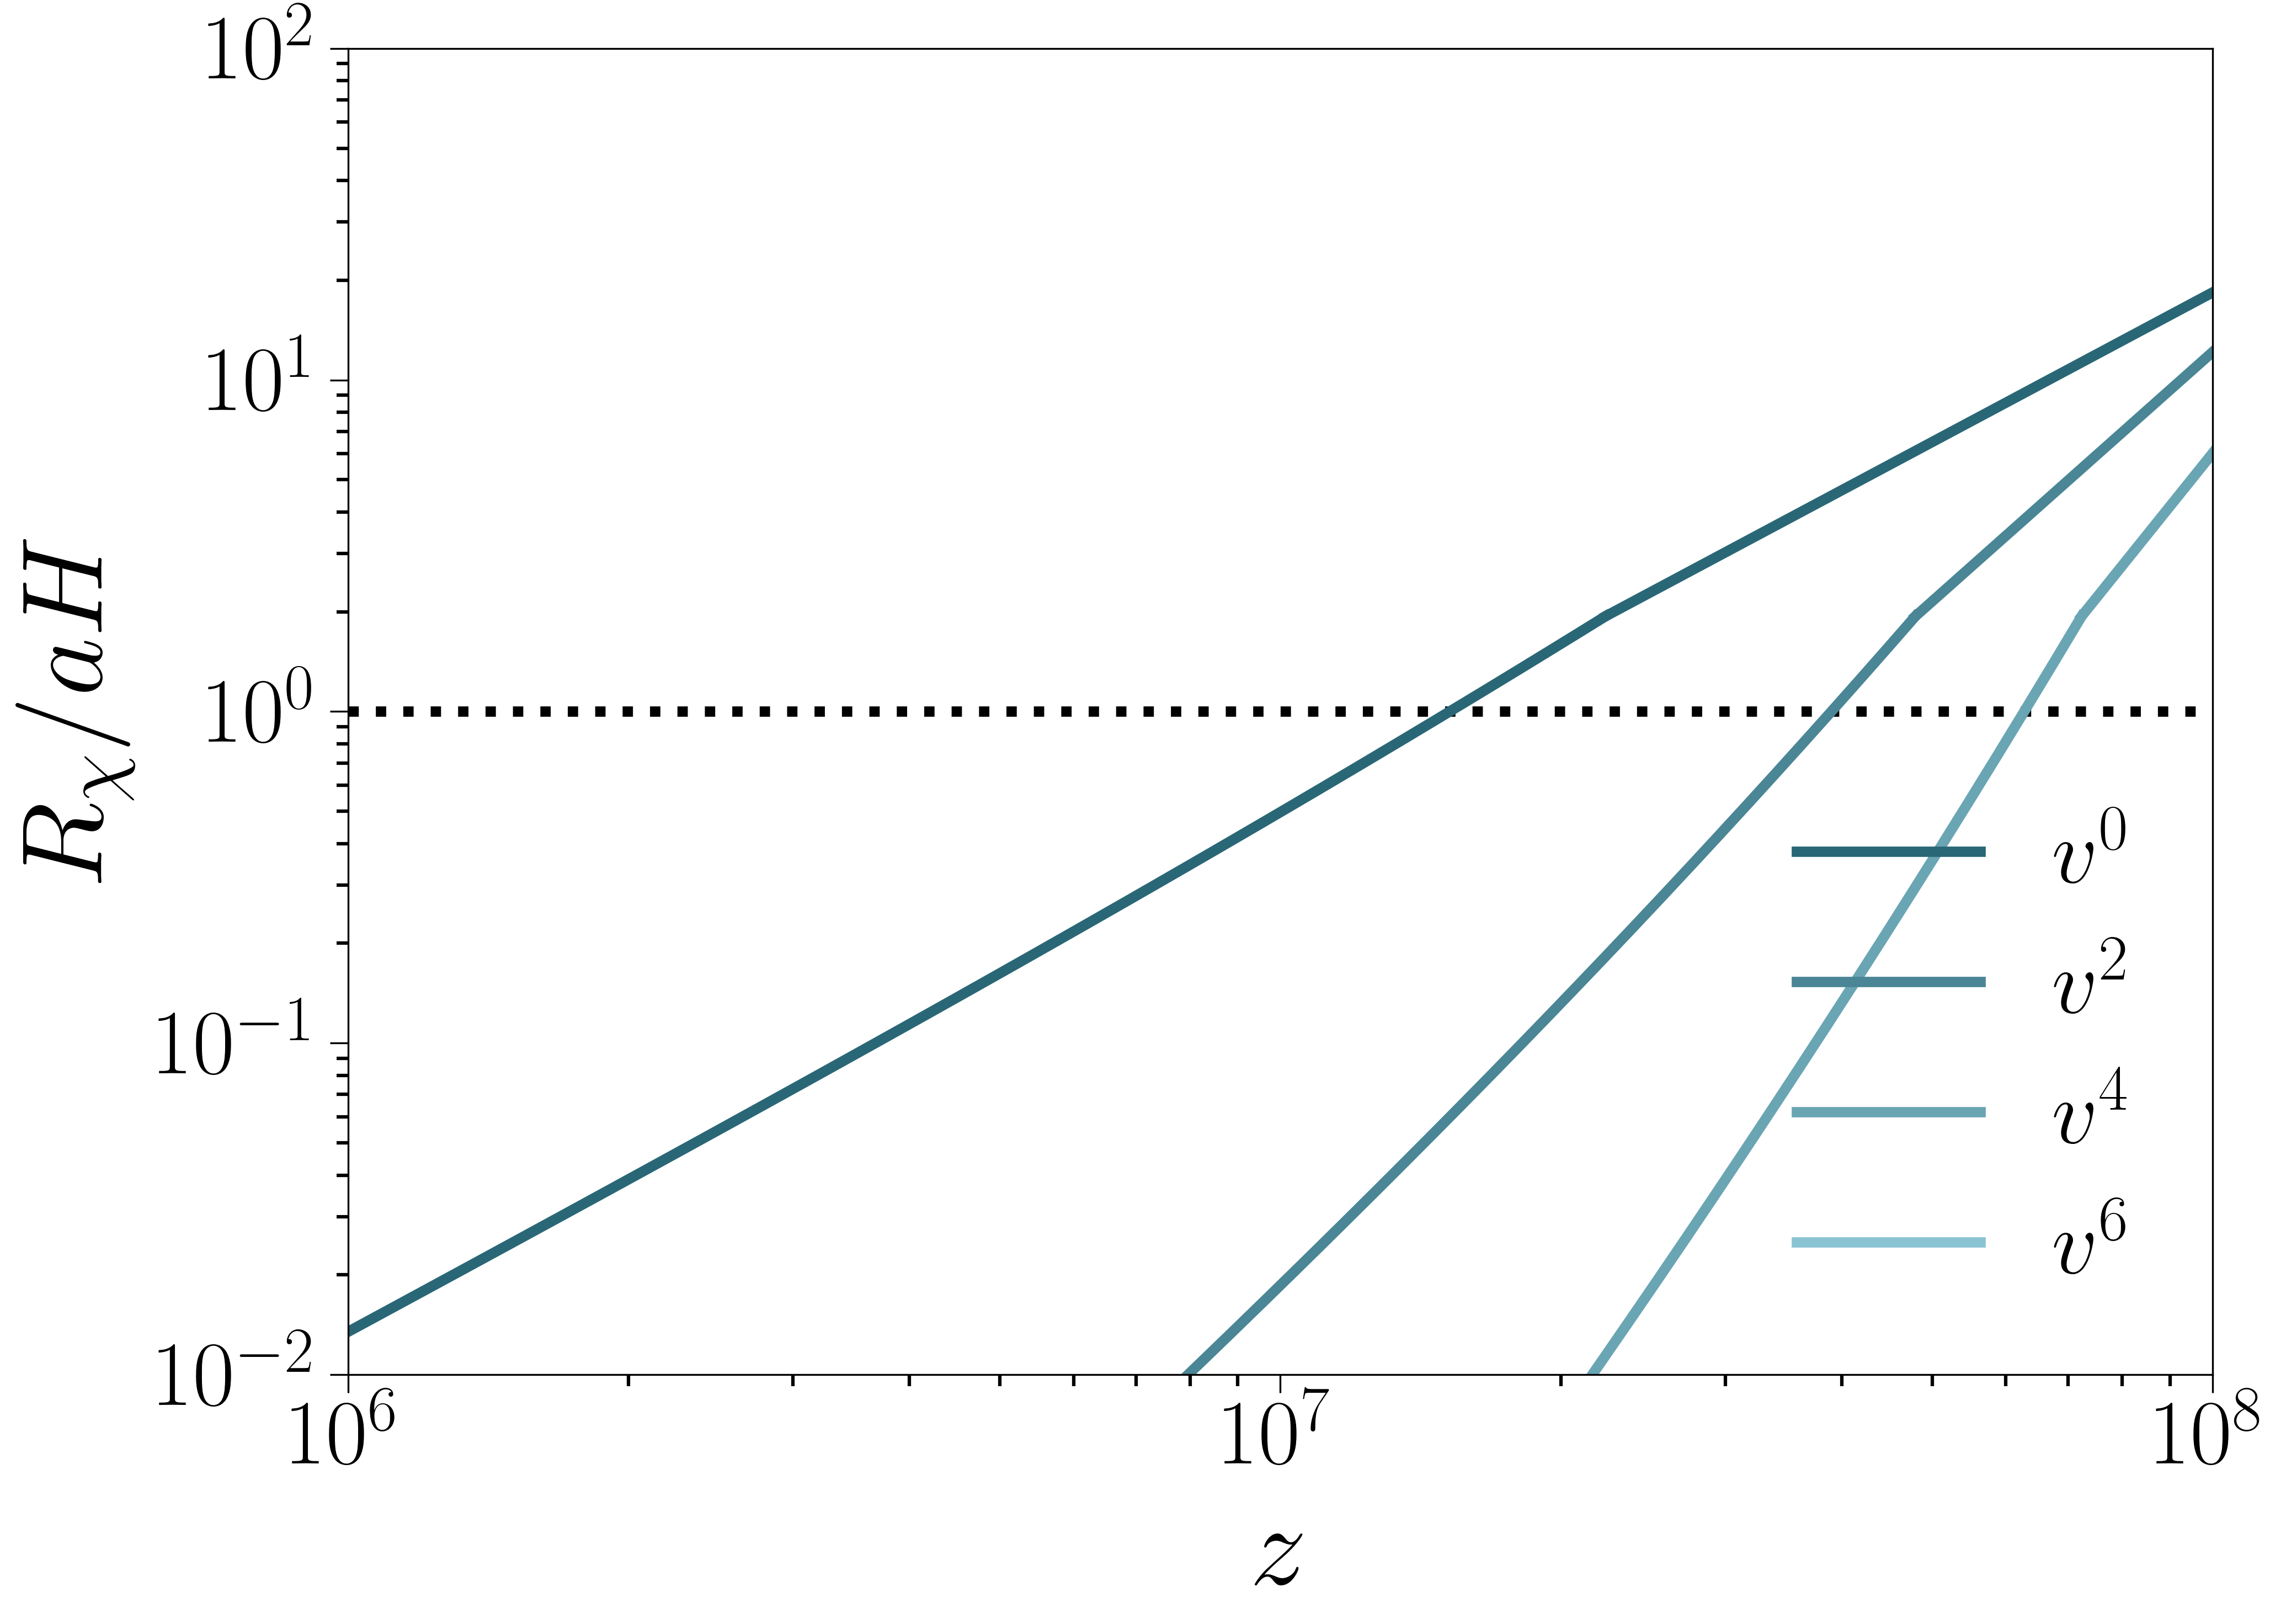

In [30]:
plt.figure(figsize=(14,10))

plt.axhline(1,c='k',ls=':',lw=4.5)
cm2 = LinearSegmentedColormap.from_list("mycmap", ['#8AC4D3','#205D6C'])

# n=0
n=0
s0=sigs0_anal[3]
zth = vds0.z_th(s0,1,n)
zkin = vds0.z_kin(s0,1,n)
zs1 = np.logspace(np.log10(zth),np.log10(1000.*zth),100)
zs2 = np.logspace(np.log10(zth/1000.),np.log10(zth),100)
plt.loglog(zs1,vds0.Rx_th(zs1,s0,1,n)/vds0.aH(zs1,s0,1,n),c=cm2(0.9),label=r'$v^{}$'.format(n),lw=4.5)
plt.loglog(zs2,vds0.Rx_kin(zs2,s0,1,n)/vds0.aH(zs2,s0,1,n),c=cm2(0.9),ls='-',lw=4.5)

n=2
s0=sigs2_anal[3]
zth = vds0.z_th(s0,1,n)
zkin = vds0.z_kin(s0,1,n)
zs1 = np.logspace(np.log10(zth),np.log10(1000.*zth),100)
zs2 = np.logspace(np.log10(zth/1000.),np.log10(zth),100)
plt.loglog(zs1,vds0.Rx_th(zs1,s0,1,n)/vds0.aH(zs1,s0,1,n),c=cm2(0.6),label=r'$v^{}$'.format(n),lw=4.5)
plt.loglog(zs2,vds0.Rx_kin(zs2,s0,1,n)/vds0.aH(zs2,s0,1,n),c=cm2(0.6),ls='-',lw=4.5)

n=4
s0=sigs4_anal[3]
zth = vds0.z_th(s0,1,n)
zkin = vds0.z_kin(s0,1,n)
zs1 = np.logspace(np.log10(zth),np.log10(1000.*zth),100)
zs2 = np.logspace(np.log10(zth/1000.),np.log10(zth),100)
plt.loglog(zs1,vds0.Rx_th(zs1,s0,1,n)/vds0.aH(zs1,s0,1,n),c=cm2(0.3),label=r'$v^4$',lw=4.5)
plt.loglog(zs2,vds0.Rx_kin(zs2,s0,1,n)/vds0.aH(zs2,s0,1,n),c=cm2(0.3),ls='-',lw=4.5)

n=6
s0=sigs6_anal[3]
zth = vds0.z_th(s0,1,n)
zkin = vds0.z_kin(s0,1,n)
zs1 = np.logspace(np.log10(zth),np.log10(1000.*zth),100)
zs2 = np.logspace(np.log10(zth/1000.),np.log10(zth),100)
plt.loglog(zs1,vds0.Rx_th(zs1,s0,1,n)/vds0.aH(zs1,s0,1,n),c=cm2(0),label=r'$v^6$',lw=4.5)
plt.loglog(zs2,vds0.Rx_kin(zs2,s0,1,n)/vds0.aH(zs2,s0,1,n),c=cm2(0),ls='-',lw=4.5)

plt.xlim(1e6,1e8)
plt.ylim(1e-2,1e2)
plt.xlabel(r'$z$',fontsize=50,labelpad=10)
plt.ylabel(r'$R_{\chi}/aH$',fontsize=50,labelpad=10)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.locator_params(axis='y', numticks=6)
plt.locator_params(axis='x', numticks=6)
plt.tick_params(length=8)
plt.tick_params(which='minor',length=5,width=1.5)

plt.legend(loc=4,fontsize=40,framealpha=0)
plt.tight_layout()
plt.savefig("Rx_aH.png")

---